
# Detecting SPAM E-MAILS using NAIVE BAYES
**Author** : Rahul Bordoloi

**Notebook used** : Google Colab




# Problem Statement

- The SMS Spam Collection is a set of SMS tagged messages that have been collected for SMS Spam research. It contains one set of SMS messages in English of 5,574 messages, tagged acording being ham (legitimate) or spam.

- The files contain one message per line. Each line is composed by two columns: v1 contains the label (ham or spam) and v2 contains the raw text.


# Importing Libraries and Dataset


In [0]:
#importing frequently used libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
#uploading files to access in colab notebook
from google.colab import files
uploaded = files.upload()

Saving emails.csv to emails.csv


In [0]:
spam_df = pd.read_csv("emails.csv")

In [0]:
spam_df.head(10)

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1
5,"Subject: great nnews hello , welcome to medzo...",1
6,Subject: here ' s a hot play in motion homela...,1
7,Subject: save your money buy getting this thin...,1
8,Subject: undeliverable : home based business f...,1
9,Subject: save your money buy getting this thin...,1


In [0]:
spam_df.tail()

,text,spam
5723,Subject: re : research and development charges...,0
5724,"Subject: re : receipts from visit jim , than...",0
5725,Subject: re : enron case study update wow ! a...,0
5726,"Subject: re : interest david , please , call...",0
5727,Subject: news : aurora 5 . 2 update aurora ve...,0


In [0]:
#Observing information about the dataframe
spam_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5728 entries, 0 to 5727
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    5728 non-null   object
 1   spam    5728 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 89.6+ KB


# Visualising Dataset

In [0]:
#observing which message is the most popular ham/spam message
spam_df.groupby('spam').describe()

text                                                               
     count unique                                                top freq
spam                                                                     
0     4360   4327  Subject: re : enron visit - - thanks  larry , ...    2
1     1368   1368  Subject: wish you could be better ?  penis gro...    1

In [0]:
#observing the length of the messages
spam_df['length'] = spam_df['text'].apply(len)
spam_df.head()

,text,spam,length
0,Subject: naturally irresistible your corporate...,1,1484
1,Subject: the stock trading gunslinger fanny i...,1,598
2,Subject: unbelievable new homes made easy im ...,1,448
3,Subject: 4 color printing special request add...,1,500
4,"Subject: do not have money , get software cds ...",1,235


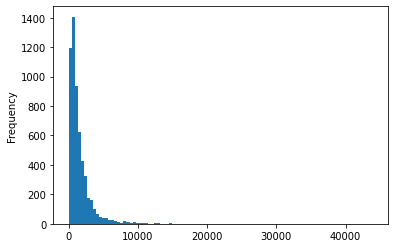

In [0]:
#frequency of how many messages were long-short-intermediate
spam_df['length'].plot(bins=100, kind='hist') 

In [0]:
#describing about the length information across all the messages
spam_df.length.describe()

count     5728.000000
mean      1556.768680
std       2042.649812
min         13.000000
25%        508.750000
50%        979.000000
75%       1894.250000
max      43952.000000
Name: length, dtype: float64

In [0]:
#observing the longest message 43952
spam_df[spam_df['length'] == 43952]['text'].iloc[0]

'Subject: from the enron india newsdesk - april 27 th newsclips  fyi news articles from indian press .  - - - - - - - - - - - - - - - - - - - - - - forwarded by sandeep kohli / enron _ development on 04 / 27 / 2001 08 : 24 am - - - - - - - - - - - - - - - - - - - - - - - - - - -  nikita varma  04 / 27 / 2001 07 : 51 am  to : nikita varma / enron _ development @ enron _ development  cc : ( bcc : sandeep kohli / enron _ development )  subject : from the enron india newsdesk - april 27 th newsclips  friday apr 27 2001 , http : / / www . economictimes . com / today / cmo 3 . htm  dpc board empowers md to cancel mseb contract  friday apr 27 2001 , http : / / www . economictimes . com / today / 27 compl 1 . htm  mseb pays rs 134 cr under \' protest \' to dpc  friday , april 27 , 001 , http : / / www . businessstandard . com / today / economy 4 . asp ? menu = 3  enron india md authorised to terminate ppa  friday , april 27 , 2001 , http : / / www . financialexpress . com / fe 20010427 / topl 

In [0]:
#dividing the messages into spam and ham
ham = spam_df[spam_df['spam']==0]
spam = spam_df[spam_df['spam']==1]

In [0]:
ham

,text,spam,length
1368,"Subject: hello guys , i ' m "" bugging you "" f...",0,1188
1369,Subject: sacramento weather station fyi - - ...,0,1997
1370,Subject: from the enron india newsdesk - jan 1...,0,7902
1371,Subject: re : powerisk 2001 - your invitation ...,0,3644
1372,Subject: re : resco database and customer capt...,0,5535
...,...,...,...
5723,Subject: re : research and development charges...,0,1189
5724,"Subject: re : receipts from visit jim , than...",0,1167
5725,Subject: re : enron case study update wow ! a...,0,2131
5726,"Subject: re : interest david , please , call...",0,1060


In [0]:
spam

,text,spam,length
0,Subject: naturally irresistible your corporate...,1,1484
1,Subject: the stock trading gunslinger fanny i...,1,598
2,Subject: unbelievable new homes made easy im ...,1,448
3,Subject: 4 color printing special request add...,1,500
4,"Subject: do not have money , get software cds ...",1,235
...,...,...,...
1363,Subject: are you ready to get it ? hello ! v...,1,347
1364,Subject: would you like a $ 250 gas card ? do...,1,188
1365,"Subject: immediate reply needed dear sir , i...",1,3164
1366,Subject: wanna see me get fisted ? fist bang...,1,734


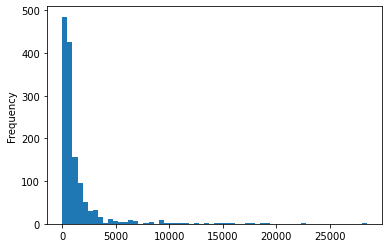

In [0]:
#frequency of how many spam messages were long-short-intermediate
spam['length'].plot(bins=60, kind='hist') 

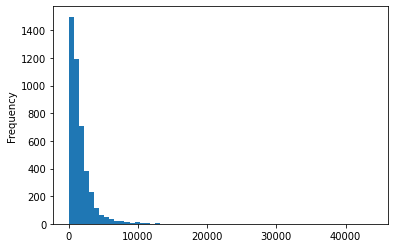

In [0]:
#frequency of how many ham messages were long-short-intermediate
ham['length'].plot(bins=60, kind='hist') 

In [0]:
#knowing about the percentage of spam messages in our dataset
print( 'Spam percentage =', (len(spam) / len(spam_df) )*100,"%")

Spam percentage = 23.88268156424581 %


In [0]:
#knowing about the percentage of spam messages in our dataset
print( 'Ham percentage =', (len(ham) / len(spam_df) )*100,"%")

Ham percentage = 76.11731843575419 %


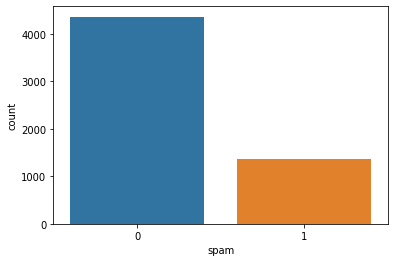

In [0]:
#visualisation of (spam vs ham) %
sns.countplot(spam_df['spam'], label = "Count") 

# Training and Testing our Model with whole Dataset

**Data Cleaning and preparing it for Testing**

In [0]:
#importing natural language toolkit and downloading all the classes associated with it
import nltk
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/biocreative_ppi.zip.
[nltk_data]    | Downloading package brown to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/brown.zip.
[nltk_data]    | Downloading package brown_tei to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/brown_tei.zip.
[nltk_data]    | Downloading package cess_cat to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cess_cat.zip.
[nltk_data]    | Downloading package cess_esp to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cess_esp.zip.
[nltk_data]    | Downloading package chat80 to /root/nltk_data...
[nltk_data]    |   Unzipp

True

In [0]:
import string
from nltk.corpus import stopwords                              #importing all the predefined stopwords
from sklearn.feature_extraction.text import CountVectorizer

In [0]:
#defining a pipeline to clean up all the messages 
#The pipeline performs the following: (1) remove punctuation, (2) remove stopwords
def message_cleaning(message):
    Test_punc_removed = [char for char in message if char not in string.punctuation]
    Test_punc_removed_join = ''.join(Test_punc_removed)
    Test_punc_removed_join_clean = [word for word in Test_punc_removed_join.split() if word.lower() not in stopwords.words('english')]
    return Test_punc_removed_join_clean

In [0]:
#applying the function on our dataset
spam_df_clean = spam_df['text'].apply(message_cleaning)

In [0]:
print(spam_df_clean[0])    # showing the cleaned up version

['Subject', 'naturally', 'irresistible', 'corporate', 'identity', 'lt', 'really', 'hard', 'recollect', 'company', 'market', 'full', 'suqgestions', 'information', 'isoverwhelminq', 'good', 'catchy', 'logo', 'stylish', 'statlonery', 'outstanding', 'website', 'make', 'task', 'much', 'easier', 'promise', 'havinq', 'ordered', 'iogo', 'company', 'automaticaily', 'become', 'world', 'ieader', 'isguite', 'ciear', 'without', 'good', 'products', 'effective', 'business', 'organization', 'practicable', 'aim', 'hotat', 'nowadays', 'market', 'promise', 'marketing', 'efforts', 'become', 'much', 'effective', 'list', 'clear', 'benefits', 'creativeness', 'hand', 'made', 'original', 'logos', 'specially', 'done', 'reflect', 'distinctive', 'company', 'image', 'convenience', 'logo', 'stationery', 'provided', 'formats', 'easy', 'use', 'content', 'management', 'system', 'letsyou', 'change', 'website', 'content', 'even', 'structure', 'promptness', 'see', 'logo', 'drafts', 'within', 'three', 'business', 'days', 

In [0]:
print(spam_df['text'][0])   # showing the original version

Subject: naturally irresistible your corporate identity  lt is really hard to recollect a company : the  market is full of suqgestions and the information isoverwhelminq ; but a good  catchy logo , stylish statlonery and outstanding website  will make the task much easier .  we do not promise that havinq ordered a iogo your  company will automaticaily become a world ieader : it isguite ciear that  without good products , effective business organization and practicable aim it  will be hotat nowadays market ; but we do promise that your marketing efforts  will become much more effective . here is the list of clear  benefits : creativeness : hand - made , original logos , specially done  to reflect your distinctive company image . convenience : logo and stationery  are provided in all formats ; easy - to - use content management system letsyou  change your website content and even its structure . promptness : you  will see logo drafts within three business days . affordability : your  mar

**Applying Count Vectorizer to our Text List**

In [0]:
from sklearn.feature_extraction.text import CountVectorizer
#Defining the cleaning pipeline we defined earlier
vectorizer = CountVectorizer(analyzer = message_cleaning)
spamham_countvectorizer = vectorizer.fit_transform(spam_df['text'])

In [0]:
#result of the countvectorizer
print(spamham_countvectorizer.toarray())  

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [0]:
spamham_countvectorizer.shape

(5728, 37229)

**Now, Training the Model with whole Dataset**

In [0]:
#training the model with Naive-Bayes Approach
from sklearn.naive_bayes import MultinomialNB
NB_classifier = MultinomialNB()
label = spam_df['spam'].values
NB_classifier.fit(spamham_countvectorizer, label)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

**Now, Testing the Model**

*    Example 1:

In [0]:
#defining pre-defined example 1 and transforming in into count vectorizer array
testing_sample = ['Free money!!!', "Hi Kim, Please let me know if you need any further information. Thanks"]
testing_sample_countvectorizer = vectorizer.transform(testing_sample)

In [0]:
#predicting the results
test_predict = NB_classifier.predict(testing_sample_countvectorizer)
test_predict

array([1, 0])

*    Example 2:

In [0]:
#defining pre-defined example 1 and transforming in into count vectorizer array
testing_sample = ['Hello, I am Rahul, I would like to book a hotel in Madrid by April 29th', 'money viagara!!!!!']
testing_sample_countvectorizer = vectorizer.transform(testing_sample)

In [0]:
#predicting the results
test_predict = NB_classifier.predict(testing_sample_countvectorizer)
test_predict

array([0, 1])

# Dividing Dataset into Train and Test Set before Training our Model

In [0]:
X = spamham_countvectorizer
y = label

In [0]:
X.shape

(5728, 37229)

In [0]:
y.shape

(5728,)

In [0]:
#spliting the dataset into train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [0]:
#Training our Dataset with Naive-Bayes' MultinomialNB Class
from sklearn.naive_bayes import MultinomialNB
NB_classifier = MultinomialNB()
NB_classifier.fit(X_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [0]:
#Another Class for using Naive-Bayes
# from sklearn.naive_bayes import GaussianNB 
# NB_classifier = GaussianNB()
# NB_classifier.fit(X_train, y_train)

# Evaluating the Model

In [0]:
from sklearn.metrics import classification_report, confusion_matrix

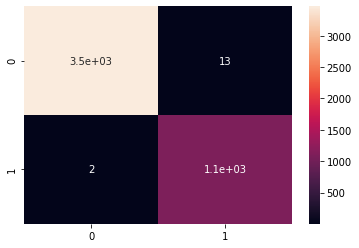

In [0]:
# Predicting the Train set results
y_predict_train = NB_classifier.predict(X_train)
y_predict_train
cm = confusion_matrix(y_train, y_predict_train)
sns.heatmap(cm, annot=True)

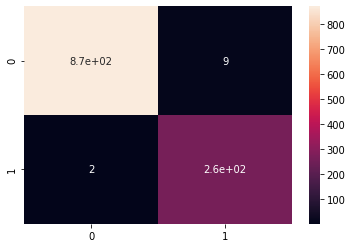

In [0]:
#Predicting the Test set results
y_predict_test = NB_classifier.predict(X_test)
cm = confusion_matrix(y_test, y_predict_test)
sns.heatmap(cm, annot=True)

In [0]:
#observating classification report for performance evaluation
print(classification_report(y_test, y_predict_test))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       879
           1       0.97      0.99      0.98       267

    accuracy                           0.99      1146
   macro avg       0.98      0.99      0.99      1146
weighted avg       0.99      0.99      0.99      1146



# TF-IDF [Additional Feature Extraction Method, not neccessary in this Project]



*  **About**


- Tf–idf stands for "Term Frequency–Inverse Document Frequency" is a numerical statistic used to reflect how important a word is to a document in a collection or corpus of documents. 
- TFIDF is used as a weighting factor during text search processes and text mining.
- The intuition behing the TFIDF is as follows: if a word appears several times in a given document, this word might be meaningful (more important) than other words that appeared fewer times in the same document. However, if a given word appeared several times in a given document but also appeared many times in other documents, there is a probability that this word might be common frequent word such as 'I' 'am'..etc. (not really important or meaningful!).


- TF: Term Frequency is used to measure the frequency of term occurrence in a document: 
    - TF(word) = Number of times the 'word' appears in a document / Total number of terms in the document
- IDF: Inverse Document Frequency is used to measure how important a term is: 
    - IDF(word) = log_e(Total number of documents / Number of documents with the term 'word' in it).

- Example: Let's assume we have a document that contains 1000 words and the term “John” appeared 20 times, the Term-Frequency for the word 'John' can be calculated as follows:
    - TF|john = 20/1000 = 0.02

- Let's calculate the IDF (inverse document frequency) of the word 'john' assuming that it appears 50,000 times in a 1,000,000 million documents (corpus). 
    - IDF|john = log (1,000,000/50,000) = 1.3

- Therefore the overall weight of the word 'john' is as follows 
    - TF-IDF|john = 0.02 * 1.3 = 0.026

In [0]:
spamham_countvectorizer

<5728x37229 sparse matrix of type '<class 'numpy.int64'>'
	with 565908 stored elements in Compressed Sparse Row format>

In [0]:
#fitting and transforming tfidf to our object
from sklearn.feature_extraction.text import TfidfTransformer
emails_tfidf = TfidfTransformer().fit_transform(spamham_countvectorizer)
print(emails_tfidf.shape)

(5728, 37229)


In [0]:
#Sparse matrix with all the values of IF-IDF
print(emails_tfidf[:,:])

  (0, 36565)	0.06908944889543289
  (0, 36432)	0.06757047739651872
  (0, 36430)	0.059679365326344706
  (0, 36025)	0.1319392730989776
  (0, 35034)	0.05233428188145157
  (0, 34800)	0.09384305652743173
  (0, 33562)	0.06921203533637368
  (0, 33037)	0.09490328795519132
  (0, 32843)	0.06073679014431701
  (0, 32617)	0.11152518721878715
  (0, 32602)	0.11962021118089677
  (0, 32319)	0.11962021118089677
  (0, 32263)	0.0789584619498058
  (0, 31968)	0.11850864343422601
  (0, 31959)	0.08499360588016656
  (0, 31547)	0.10454173100334828
  (0, 30218)	0.04607380847274443
  (0, 29858)	0.09333645170409068
  (0, 28879)	0.07691781511072393
  (0, 28266)	0.09213153238881405
  (0, 28110)	0.11014658587128429
  (0, 27986)	0.06591875520600377
  (0, 27225)	0.0732875367149963
  (0, 27224)	0.05761542024424838
  (0, 27122)	0.11082209685254277
  :	:
  (5727, 7921)	0.04309622276800823
  (5727, 7842)	0.09382800880629484
  (5727, 7841)	0.08777996676891853
  (5727, 5729)	0.5517795052228944
  (5727, 5629)	0.023897736992445

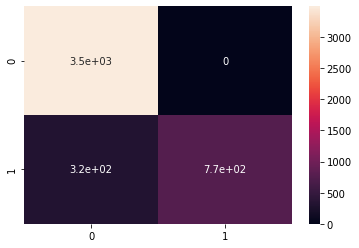

In [0]:
#now splitting dataset into train and test set
X = emails_tfidf
y = label

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

#now applying Naive-Bayes to our train sets
from sklearn.naive_bayes import MultinomialNB
NB_classifier = MultinomialNB()
NB_classifier.fit(X_train, y_train)

#now evaluating our results
from sklearn.metrics import classification_report, confusion_matrix
y_predict_train = NB_classifier.predict(X_train)
y_predict_train
cm = confusion_matrix(y_train, y_predict_train)
sns.heatmap(cm, annot=True)

In [0]:
#classification report of our classifier
print(classification_report(y_test, y_predict_test))

              precision    recall  f1-score   support

           0       0.75      0.76      0.76       867
           1       0.24      0.23      0.24       279

    accuracy                           0.63      1146
   macro avg       0.50      0.50      0.50      1146
weighted avg       0.63      0.63      0.63      1146



# End